CNN For CIFAR 10

In [0]:
# Including all required libraries
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#importing dataset
cifar10=tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train,x_test=x_train/255.0,x_test/255.0
y_train,y_test=y_train.flatten(),y_test.flatten()
print(x_train.shape);print(y_train.shape)

170500096/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3)
(50000,)


In [4]:
#Getting number of classes
K=len(set(y_train))
print("no. of classes :", K)

no. of classes : 10


In [5]:
#Building the model using functional API
#Doing Convolutional Section
i=Input(shape=x_train[0].shape)
x=Conv2D(32,(3,3),strides=2, activation='relu')(i)
x=Conv2D(64,(3,3),strides=2,activation='relu')(x)
x=Conv2D(128,(3,3),strides=2,activation='relu')(x)
x=Flatten()(x)
x=Dropout(0.5)(x)
#Doing the Neural network part
x=Dense(1024,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(K,activation='softmax')(x)

#Specifying the model
model=Model(i,x)

#Specifying loss function and optimizer
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Training the model
Classifier=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6001 - accuracy: 0.4149 - val_loss: 1.3220 - val_accuracy: 0.5135
Epoch 2/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3117 - accuracy: 0.5261 - val_loss: 1.1845 - val_accuracy: 0.5727
Epoch 3/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1861 - accuracy: 0.5751 - val_loss: 1.0921 - val_accuracy: 0.6062
Epoch 4/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0977 - accuracy: 0.6069 - val_loss: 1.0203 - val_accuracy: 0.6442
Epoch 5/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0258 - accuracy: 0.6332 - val_loss: 0.9903 - val_accuracy: 0.6450
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9604 - accuracy: 0.6601 - val_loss: 0.9779 - val_accuracy: 0.6528
Epoch 7/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9126 - accuracy: 0.6752 - val_loss: 0.9218 - val_accuracy:

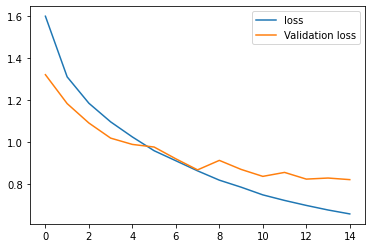

In [6]:
#Plotting loss per iteration
plt.plot(Classifier.history['loss'], label='loss')
plt.plot(Classifier.history['val_loss'], label='Validation loss')
plt.legend()

Confusion Matrix without Normalization: 
[[771  12  46  18  24   5  12  18  61  33]
 [ 21 793   6   7   3   6   7   3  36 118]
 [ 57  10 583  70 109  44  68  35  20   4]
 [ 19   8  58 559  82 136  71  33  15  19]
 [ 25   3  54  61 682  34  48  77  12   4]
 [ 11   3  40 224  63 561  26  51  12   9]
 [  7   5  29  56  48  23 812   7   9   4]
 [ 17   4  23  34  63  49   7 785   5  13]
 [ 68  21   9  13  16   5   4   3 844  17]
 [ 39  54  12  14  11   4   8  10  38 810]]


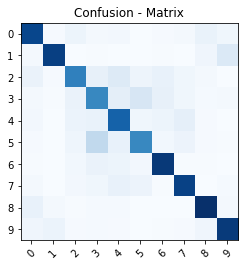

In [7]:
#Showing Confusion Matrix
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm,classes, normalize=False, title='Confusion - Matrix', cmap=plt.cm.Blues):
  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:np.newaxis]
    print("Normalized Confusion matrix :")
  else:
    print("Confusion Matrix without Normalization: ")
  print(cm)

  plt.imshow(cm, interpolation='nearest',cmap=cmap)
  plt.title(title)
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks,classes)


p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(K)))

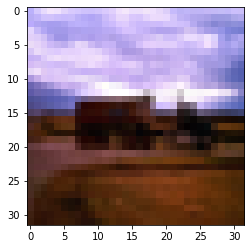

In [29]:
#Showing Misclassified Idx
misclassified_Idx=np.where([p_test!=y_test])[1]
i=np.random.choice(misclassified_Idx)
plt.imshow(x_test[i].reshape(32,32,3))

In [31]:
#Saving the model
model.save('CIFAR-10.h5')

import os
os.listdir()

['.config', 'CIFAR-10.h5', 'sample_data']